<a href="https://colab.research.google.com/github/ACCMouli/chandu/blob/main/ml/logistic/bank_subscription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
bank_df = pd.read_csv( 'https://raw.githubusercontent.com/giridhar276/genai/refs/heads/main/ml/logistic/bank.csv')
bank_df.head(5)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.7+ KB


In [5]:
bank_df.subscribed.value_counts()  # we can see it is imbalanced datset

,count
subscribed,
no,4000
yes,521


In [6]:
## Importing resample from *sklearn.utils* package.
from sklearn.utils import resample

In [7]:
# Separate the case of yes-subscribes and no-subscribes
bank_subscribed_no = bank_df[bank_df.subscribed == 'no']
bank_subscribed_yes = bank_df[bank_df.subscribed == 'yes']

In [8]:
##Upsample the yes-subscribed cases.
df_minority_upsampled = resample(bank_subscribed_yes,replace=True, n_samples=2000) #2000

In [9]:
# Combine majority class with upsampled minority class
new_bank_df = pd.concat([bank_subscribed_no, df_minority_upsampled])

In [10]:
len(new_bank_df)

6000

In [11]:
new_bank_df.subscribed.value_counts()

,count
subscribed,
no,4000
yes,2000


In [12]:
from sklearn.utils import shuffle
new_bank_df = shuffle(new_bank_df)

In [13]:
print(new_bank_df)

      age          job  marital  education default  balance housing-loan  \
3589   38   management  married    unknown      no     3576           no   
4300   59      retired  married    primary      no        0           no   
2419   41  blue-collar   single  secondary     yes     -386           no   
2654   36   management  married   tertiary      no     1133          yes   
3553   68      retired  married  secondary      no    19317          yes   
...   ...          ...      ...        ...     ...      ...          ...   
3942   49   management  married    primary      no     3371           no   
3117   30  blue-collar   single  secondary      no     2145          yes   
689    30   technician   single   tertiary      no       60          yes   
2193   39       admin.   single    unknown      no        0          yes   
999    20      student   single  secondary      no      291           no   

     personal-loan  current-campaign  previous-campaign subscribed  
3589            no

In [14]:
# Assigning list of all column names in the DataFrame
X_features = list( new_bank_df.columns )

In [15]:
# Remove the response variable from the list
X_features.remove( 'subscribed' )
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [16]:
## get_dummies() will convert all the columns with data type as objects
encoded_bank_df = pd.get_dummies( new_bank_df[X_features], drop_first = True )
X = encoded_bank_df

In [17]:
X

,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
3589,38,3576,2,1,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
4300,59,0,2,0,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2419,41,-386,1,0,True,False,False,False,False,False,...,False,False,False,True,True,False,False,True,False,True
2654,36,1133,1,2,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
3553,68,19317,1,0,False,False,False,False,True,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3942,49,3371,2,0,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3117,30,2145,2,0,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
689,30,60,5,0,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,True
2193,39,0,1,0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False


In [18]:
# Encoding the subscribed column and assigning to Y
Y = new_bank_df.subscribed.map( lambda x: int( x == 'yes') )

In [19]:
Y

,subscribed
3589,1
4300,1
2419,1
2654,1
3553,1
...,...
3942,1
3117,1
689,0
2193,0


In [20]:
## splitting training and test data
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X,Y,test_size = 0.3,random_state = 42 )

In [21]:
### logistic regression
## building the model
from sklearn.linear_model import LogisticRegression
## Initializing the model
logit = LogisticRegression()
## Fitting the model with X and Y values of the dataset
logit.fit( train_X, train_y)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
## make prediction
pred_y = logit.predict(test_X)

In [23]:
### predicting all the Y values for test_X
pred_y

array([0, 0, 1, ..., 0, 1, 1])

In [24]:
## predicint
pred_single = logit.predict([[34,202,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1]])
pred_single

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [25]:
## confusion matrix

In [26]:
## Importing the metrics
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt


In [27]:
## Defining the matrix to draw the confusion metrix from actual and predicted class labels
def draw_cm( actual, predicted ):
# Invoking confusion_matrix from metric package. The matrix will oriented as[1,0] i.e.
# the classes with label 1 will be reprensted the first row and 0 as secondrow
    cm = metrics.confusion_matrix( actual, predicted )
    ## Confustion will be plotted as heatmap for better visualization
    ## The lables are configured to better interpretation from the plot
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Subscribed", "Not Subscribed"] ,
    yticklabels = ["Subscribed", "Not Subscribed"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



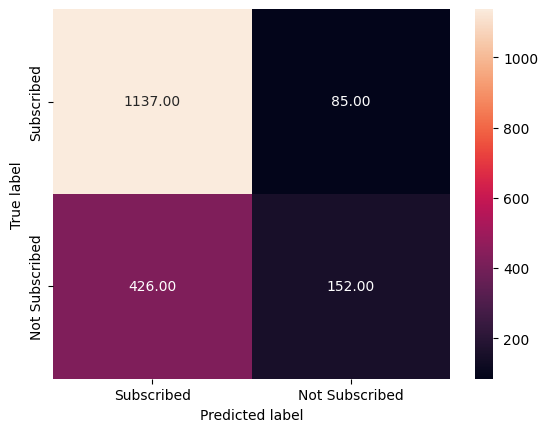

In [28]:
cm = draw_cm( test_y, pred_y )


In [29]:

#ROC AUC Score

## Predicting the probability values for test cases
predict_proba_df = pd.DataFrame( logit.predict_proba( test_X ) )
predict_proba_df.head()
#cm

,0,1
0,0.846011,0.153989
1,0.960024,0.039976
2,0.468761,0.531239
3,0.695507,0.304493
4,0.693744,0.306256


In [30]:
## Initializing the DataFrame with actual class lables
test_results_df = pd.DataFrame( { 'actual': test_y } )
test_results_df = test_results_df.reset_index()
## Assigning the probability values for class label 1
test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]

In [31]:
test_results_df.head(5)

,index,actual,chd_1
0,490,0,0.153989
1,1495,0,0.039976
2,2568,1,0.531239
3,2637,0,0.304493
4,3105,0,0.306256


In [32]:
# Passing actual class labels and the predicted probability values to compute ROC AUC score.
auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1)
round( float( auc_score ), 2 )

0.67

In [33]:
## The method takes the three following parameters
## model: the classification model
## test_X: X features of the test set
## test_y: actual labels of the test set
## Returns
## - ROC Auc Score
## - FPR and TPRs for different threshold values
def draw_roc_curve( model, test_X, test_y ):
    ## Creating and initializing a results DataFrame with actual labels
    test_results_df = pd.DataFrame( { 'actual': test_y } )
    test_results_df = test_results_df.reset_index()
    # predict the probabilities on the test set
    predict_proba_df = pd.DataFrame( model.predict_proba( test_X ) )
    ## selecting the probabilities that the test example belongs to class 1
    test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]
    ## Invoke roc_curve() to return the fpr, tpr and threshold values.
    ## threshold values contain values from 0.0 to 1.0
    fpr, tpr, thresholds = metrics.roc_curve( test_results_df.actual,
    test_results_df.chd_1,
    drop_intermediate = False )
    ## Getting the roc auc score by invoking metrics.roc_auc_score method
    auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1 )
    ## Setting the size of the plot
    plt.figure(figsize=(8, 6))
    ## plotting the actual fpr and tpr values
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    ## plotting th diagnoal line from (0,1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    ## Setting labels and titles
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return auc_score, fpr, tpr, thresholds

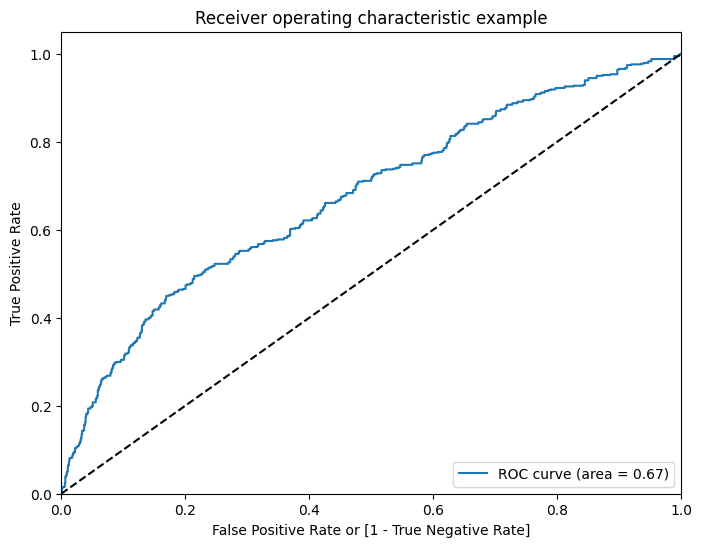

In [34]:
## Invoking draw_roc_curve with the logistic regresson model
_, _, _, _ = draw_roc_curve( logit, test_X, test_y )